Manufactured Solution experiment based on SAND2000 - 1444

Test based on heat flux example in SAND2000 - 1444 Section 3

In [1]:
%matplotlib inline

In [2]:
import fipy as fp

In [3]:
from sympy import symbols, sin, exp, sqrt, init_printing

In [4]:
from sympy import diff, simplify, Eq, lambdify

In [5]:
init_printing(use_unicode=True)

In [6]:
x, y, z, t = symbols('x y z t')

In [7]:
T0, R, t0, k0, rho0, Cp0 = symbols('T0 R t0 k0 rho0 Cp0')

In [8]:
T_sym = T0 * (1 + sin(x/R)**2 * sin(2*y/R)**2 * sin(3*z/R)**2) * exp(t*(t0-t)/t0)

In [9]:
k_sym = k0 * (1 + sqrt(x**2 + 2*y**2 + 3*z**2) / R)

In [10]:
rho_sym = rho0 * (1 + sqrt(3*x**2 + y**2 + 2*z**2) / R)

In [11]:
Cp_sym = Cp0 * (1 + sqrt(2*x**2 + 3*y**2 + z**2) / R)

In [12]:
g_sym = \
simplify(diff(Cp_sym * rho_sym * T_sym, t)
         - diff(k_sym * diff(T_sym, x), x) 
         - diff(k_sym * diff(T_sym, y), y)
         - diff(k_sym * diff(T_sym, z), z))

In [13]:
g_sym

T0*(-Cp0*R*rho0*(R + sqrt(2*x**2 + 3*y**2 + z**2))*(R + sqrt(3*x**2 + y**2 + 2*z**2))*(2*t - t0)*(sin(x/R)**2*sin(2*y/R)**2*sin(3*z/R)**2 + 1)*sqrt(x**2 + 2*y**2 + 3*z**2) - 2*R*k0*t0*(x*sin(2*y/R)*sin(3*z/R)*cos(x/R) + 4*y*sin(x/R)*sin(3*z/R)*cos(2*y/R) + 9*z*sin(x/R)*sin(2*y/R)*cos(3*z/R))*sin(x/R)*sin(2*y/R)*sin(3*z/R) + 2*k0*t0*(R + sqrt(x**2 + 2*y**2 + 3*z**2))*sqrt(x**2 + 2*y**2 + 3*z**2)*(14*sin(x/R)**2*sin(2*y/R)**2*sin(3*z/R)**2 - 9*sin(x/R)**2*sin(2*y/R)**2*cos(3*z/R)**2 - 4*sin(x/R)**2*sin(3*z/R)**2*cos(2*y/R)**2 - sin(2*y/R)**2*sin(3*z/R)**2*cos(x/R)**2))*exp(-t*(t - t0)/t0)/(R**3*t0*sqrt(x**2 + 2*y**2 + 3*z**2))

In [14]:
subs = [(R, 3.33), (T0, 100), (Cp0, 1), (rho0, 0), (k0, 1), (t0, 1)]

In [15]:
g_sub = g_sym.subs(subs)

In [16]:
g_fp = lambdify((x, y, z, t), g_sub, modules=fp.numerix)

In [17]:
T_sub = T_sym.subs(subs)

In [18]:
T_fp = lambdify((x, y, z, t), T_sub, modules=fp.numerix)

In [19]:
k_sub = k_sym.subs(subs)

In [20]:
k_fp = lambdify((x, y, z, t), k_sub, modules=fp.numerix)

In [21]:
rho_sub = rho_sym.subs(subs)

In [22]:
rho_fp = lambdify((x, y, z, t), rho_sub, modules=fp.numerix)

In [23]:
Cp_sub = Cp_sym.subs(subs)

In [24]:
Cp_fp = lambdify((x, y, z, t), Cp_sub, modules=fp.numerix)

In [25]:
mesh = fp.Grid2D(Lx=10., dx=.1, Ly=20., dy=.1)

In [26]:
xx, yy = mesh.cellCenters[0], mesh.cellCenters[1]

In [27]:
XX, YY = mesh.faceCenters[0], mesh.faceCenters[1]

In [28]:
zz = 5.

In [95]:
T = fp.CellVariable(mesh=mesh, name="$T$", value=T_fp(xx, yy, zz, 0.)*0.01, hasOld=True)

In [96]:
time = fp.Variable(name="$t$", value=0.)

In [97]:
T.constrain(T_fp(XX, YY, zz, time), where=mesh.exteriorFaces)

In [98]:
eq = (fp.DiffusionTerm(coeff=k_fp(XX, YY, zz, time)) + g_fp(xx, yy, zz, time) 
      == fp.TransientTerm(coeff=rho_fp(xx, yy, zz, time) * Cp_fp(xx, yy, zz, time)))

In [99]:
dt = 0.1

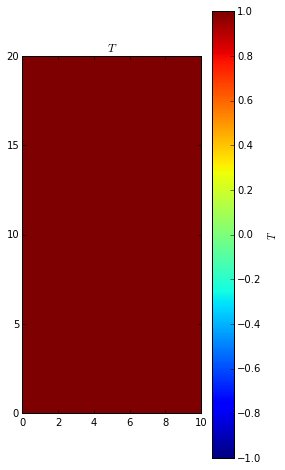

In [100]:
viewer = fp.Viewer(vars=T)

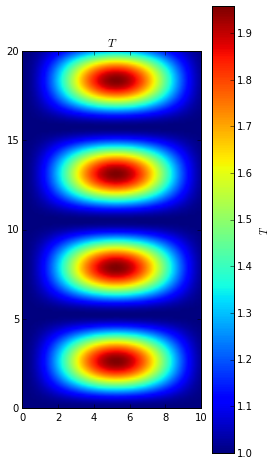

In [101]:
viewer.plot()

In [102]:
time.value = 0.

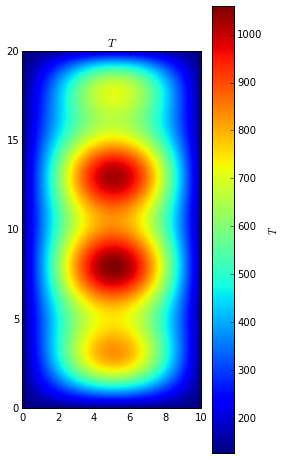

time =  0.6


In [109]:
T.updateOld()
eq.solve(var=T, dt=dt)
viewer.plot()
print "time = ", time
time.value = time() + dt

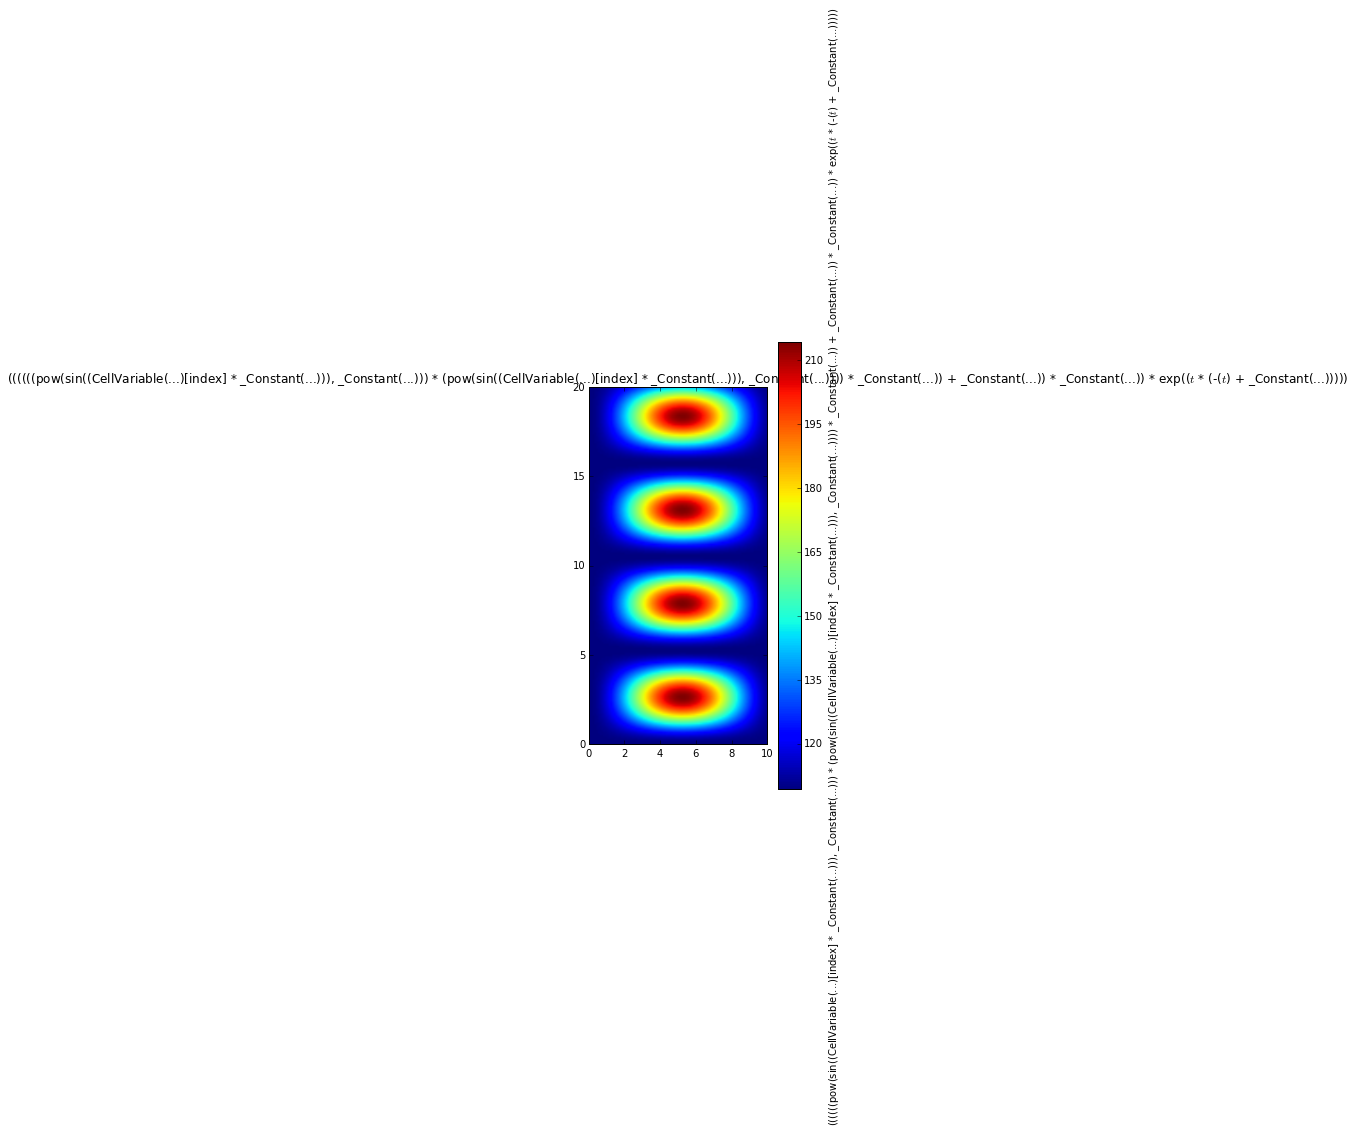

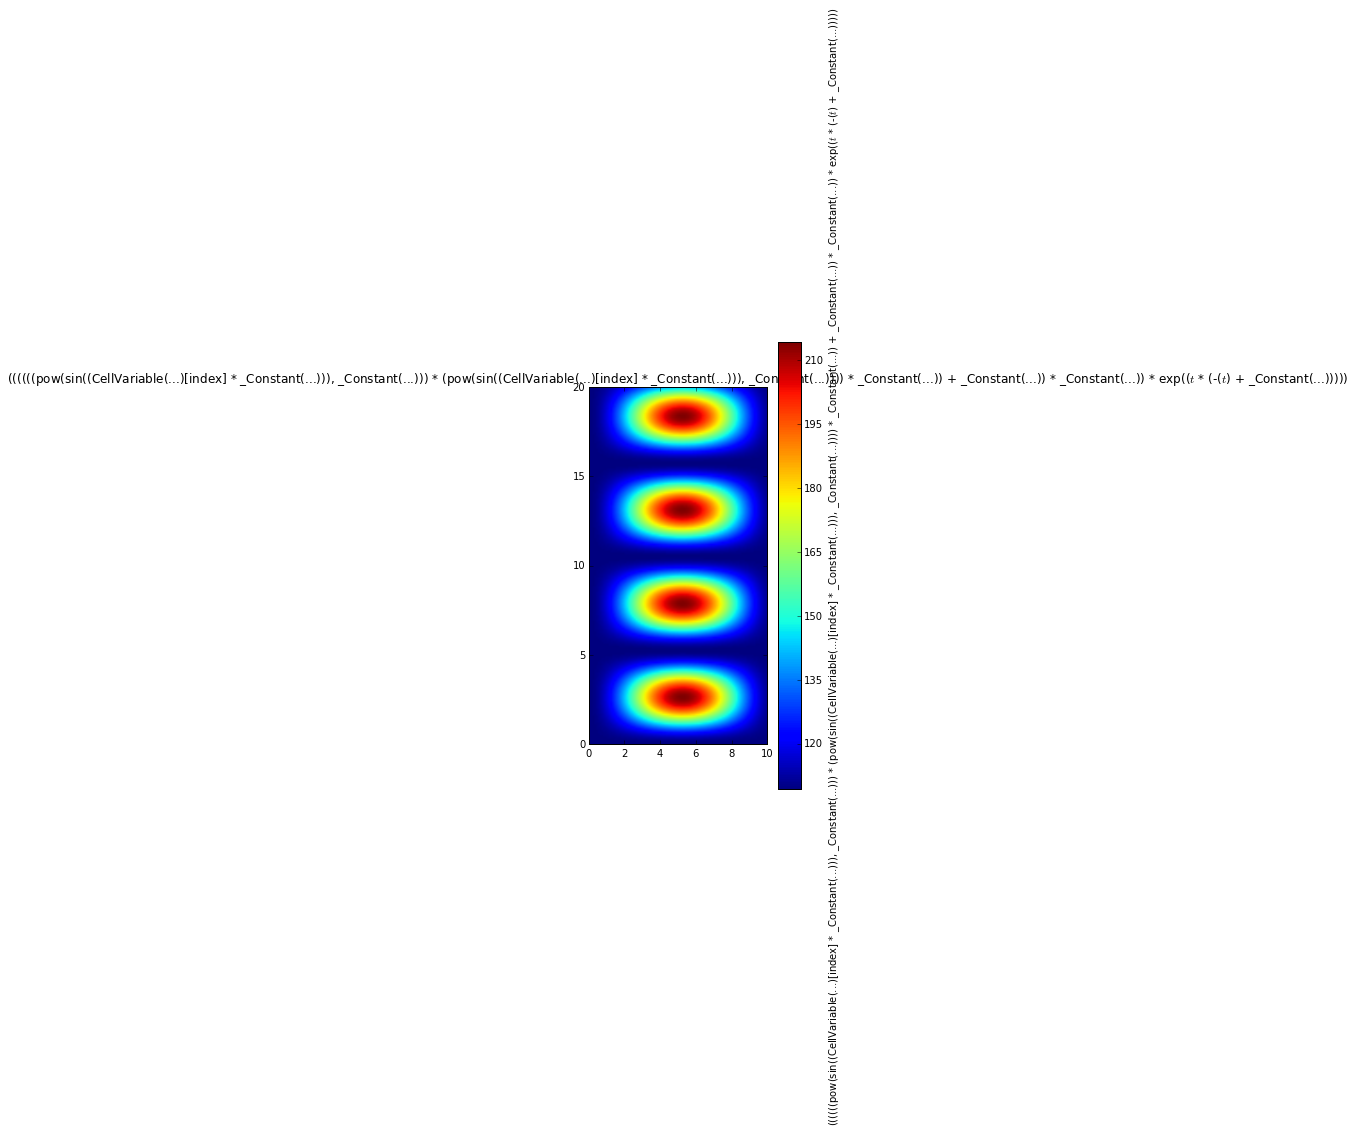

In [94]:
fp.Viewer(vars=T_fp(xx, yy, zz, time))

In [91]:
g_ms = g_fp(xx, yy, zz, time)

In [92]:
g_ms.name = "$g$"

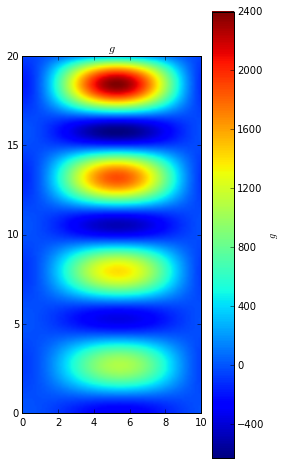

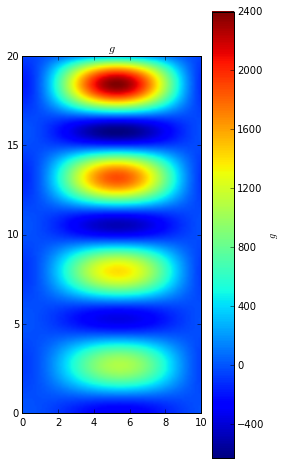

In [93]:
fp.Viewer(vars=g_ms)